<a href="https://colab.research.google.com/github/pdrzxzz/risk-score-praso/blob/main/notebook/risk_score_praso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📥 Importing

In [74]:
# !pip install lazypredict

In [75]:
# 📦 Built-in
import re

# 📊 Data manipulation & visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# ⚙️ Scikit-learn: preprocessing & model selection
from sklearn.model_selection import (
    train_test_split,
    learning_curve,
    StratifiedKFold,
    GridSearchCV,
    cross_val_score
)
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, StandardScaler

# 🤖 Scikit-learn: models & metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 🚀 LazyPredict
# from lazypredict.Supervised import LazyClassifier

# 🔄 Fetch data

In [76]:
url = 'https://raw.githubusercontent.com/pdrzxzz/risk-score-praso/main/data/praso-data.csv'
df = pd.read_csv(url)
df.shape

(12458, 20)

# 👁️ Glance of data

In [77]:
df.sample(5)

,uf,municipio,segmento_cliente,natureza_juridica,fonte_cliente,cnae_codigo,cnae_descricao,capital_social,idade_cnpj,serasa_contagem_negativacoes,serasa_contagem_protestos,serasa_idade_divida_mais_recente,serasa_credores,serasa_socio_tem_negativacao,ifood_contagem_avaliacoes,ifood_faixa_preco,google_maps_avaliacao,google_maps_contagem_avaliacoes,google_maps_tem_website,inadimplente
9080,CE,CASCAVEL,Mercearia & Mercado,213-5 - Empresário (Individual),Fonte 1,47.12-1-00,"Comércio varejista de mercadorias em geral, co...","(15000, 20000]","(50, 100]",0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1
364,PE,JABOATAO DOS GUARARAPES,Lanches & Salgados,213-5 - Empresário (Individual),Fonte 5,45.20-0-05,"Serviços de lavagem, lubrificação e polimento ...","(1, 200]","(50, 100]",0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1
4603,PE,OLINDA,Restaurante Brasileiro,213-5 - Empresário (Individual),Fonte 5,56.12-1-00,Serviços ambulantes de alimentação,"(1, 200]","(1300, 1600]",0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0
7280,PE,RECIFE,Restaurante Brasileiro,213-5 - Empresário (Individual),Fonte 1,56.11-2-01,Restaurantes e similares,"(15000, 20000]","(4000, 5000]",0,1,36.0,NaN,0,NaN,NaN,"(4.5, 5.0]","(20, 30]",1.0,0
2506,CE,FORTALEZA,Restaurante Brasileiro,213-5 - Empresário (Individual),Fonte 1,82.99-7-99,Outras atividades de serviços prestados princi...,"(3000, 5000]","(1300, 1600]",0,0,NaN,NaN,1,NaN,NaN,"(4.5, 5.0]","(0, 5]",1.0,1


In [78]:
print(f"The dataset contains {df.shape[0]:,} rows and {df.shape[1]:,} columns.")

The dataset contains 12,458 rows and 20 columns.


In [79]:
# Fonts
df.value_counts('natureza_juridica')

,count
natureza_juridica,
213-5 - Empresário (Individual),9911
206-2 - Sociedade Empresária Limitada,2490
230-5 - Empresa Individual de Responsabilidade Limitada (de Natureza Empresária),26
205-4 - Sociedade Anônima Fechada,16
223-2 - Sociedade Simples Pura,4
224-0 - Sociedade Simples Limitada,4
204-6 - Sociedade Anônima Aberta,2
232-1 - Sociedade Unipessoal de Advocacia,2
203-8 - Sociedade de Economia Mista,1


In [80]:
# Fonts
df.value_counts('fonte_cliente').head(10)

,count
fonte_cliente,
Fonte 1,4524
Fonte 5,3937
Fonte 2,3361
Fonte 4,387
Fonte 3,249


In [81]:
# 10 cities with more costumers
df.value_counts('municipio').head(10)

,count
municipio,
FORTALEZA,2723
RECIFE,2213
JOAO PESSOA,1251
MACEIO,1137
JABOATAO DOS GUARARAPES,673
OLINDA,502
PAULISTA,402
CARUARU,361
CAUCAIA,294


In [82]:
# States with more costumers
df.value_counts('uf')

,count
uf,
PE,5641
CE,3949
PB,1631
AL,1237


In [83]:
# States with more costumers
df.value_counts('segmento_cliente').head(10)

,count
segmento_cliente,
Restaurante Brasileiro,2825
Mercearia & Mercado,1676
Doces & Confeitaria,1645
Lanches & Salgados,1558
Padaria,744
Pizza & Massas,703
Hambúrguer,459
Bar,421
Distribuidor,342


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12458 entries, 0 to 12457
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uf                                12458 non-null  object 
 1   municipio                         12458 non-null  object 
 2   segmento_cliente                  12458 non-null  object 
 3   natureza_juridica                 12458 non-null  object 
 4   fonte_cliente                     12458 non-null  object 
 5   cnae_codigo                       12458 non-null  object 
 6   cnae_descricao                    12458 non-null  object 
 7   capital_social                    12458 non-null  object 
 8   idade_cnpj                        12458 non-null  object 
 9   serasa_contagem_negativacoes      12458 non-null  int64  
 10  serasa_contagem_protestos         12458 non-null  int64  
 11  serasa_idade_divida_mais_recente  2356 non-null   float64
 12  sera

In [85]:
df.describe()

,serasa_contagem_negativacoes,serasa_contagem_protestos,serasa_idade_divida_mais_recente,serasa_socio_tem_negativacao,google_maps_tem_website,inadimplente
count,12458.000000,12458.000000,2356.000000,12458.000000,1038.0,12458.000000
mean,0.942447,1.034596,14.536927,0.480334,1.0,0.409697
std,11.040111,62.842488,14.169609,0.499633,0.0,0.491797
min,0.000000,0.000000,1.000000,0.000000,1.0,0.000000
25%,0.000000,0.000000,3.000000,0.000000,1.0,0.000000
50%,0.000000,0.000000,9.000000,0.000000,1.0,0.000000
75%,0.000000,0.000000,21.000000,1.000000,1.0,1.000000
max,912.000000,6917.000000,60.000000,1.000000,1.0,1.000000


# 🧹 Data Cleaning

## ❓ Null values?

In [86]:
df.isna().sum().sort_values(ascending=False)

,0
ifood_contagem_avaliacoes,11978
ifood_faixa_preco,11604
google_maps_avaliacao,11593
google_maps_contagem_avaliacoes,11420
google_maps_tem_website,11420
serasa_credores,10483
serasa_idade_divida_mais_recente,10102
uf,0
natureza_juridica,0
segmento_cliente,0


In [87]:
null_df = (df.isnull().sum()/len(df)*100).sort_values(ascending=True).reset_index()
x_axis_name = '% of null'
y_axis_name = 'column'
null_df = null_df.rename(columns={'index': y_axis_name, 0: x_axis_name})
fig = px.bar(null_df, x=x_axis_name, y=y_axis_name, orientation='h')
fig.update_layout(
    width=1200, height=500,
    margin=dict(t=100),
    title={
        'text': 'Null values per column (%)',
        'x': 0.5,
        'font': {
            'size': 30,
            }
        }
    )
fig.show()

7 columns have at least 80% of null values.

In [88]:
# df = df.dropna(axis=1)
# df.shape

In [89]:
df.isna().sum().sum()

np.int64(78600)

## 2️⃣ Any duplicated rows?

In [90]:
df.duplicated().sum()

np.int64(139)

In [91]:
df[df.duplicated(keep=False) & (df['segmento_cliente'] == 'Bar')]

,uf,municipio,segmento_cliente,natureza_juridica,fonte_cliente,cnae_codigo,cnae_descricao,capital_social,idade_cnpj,serasa_contagem_negativacoes,serasa_contagem_protestos,serasa_idade_divida_mais_recente,serasa_credores,serasa_socio_tem_negativacao,ifood_contagem_avaliacoes,ifood_faixa_preco,google_maps_avaliacao,google_maps_contagem_avaliacoes,google_maps_tem_website,inadimplente
1238,CE,FORTALEZA,Bar,213-5 - Empresário (Individual),Fonte 2,56.11-2-04,Bares e outros estabelecimentos especializados...,"(5000, 8000]","(900, 1150]",0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0
4796,CE,FORTALEZA,Bar,213-5 - Empresário (Individual),Fonte 2,56.11-2-04,Bares e outros estabelecimentos especializados...,"(5000, 8000]","(900, 1150]",0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0
7712,AL,MACEIO,Bar,213-5 - Empresário (Individual),Fonte 5,56.11-2-04,Bares e outros estabelecimentos especializados...,"(0, 1]","(4000, 5000]",0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0
11501,AL,MACEIO,Bar,213-5 - Empresário (Individual),Fonte 5,56.11-2-04,Bares e outros estabelecimentos especializados...,"(0, 1]","(4000, 5000]",0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0


We have duplicated rows, but it's fine.

Duplicated rows are different costumers with the same profile,   
which can be useful to strength the statistical signal of that profile in the model.

## ⏸️ Columns with same info?

In [92]:
df['cnae_descricao'].value_counts()

,count
cnae_descricao,
Restaurantes e similares,2226
"Lanchonetes, casas de chá, de sucos e similares",1827
"Comércio varejista de mercadorias em geral, com predominância de produtos alimentícios - minimercados, mercearias e armazéns",1204
Fornecimento de alimentos preparados preponderantemente para consumo domiciliar,1162
Fabricação de produtos de padaria e confeitaria com predominância de produção própria,876
...,...
Atividades de atenção ambulatorial não especificadas anteriormente,1
Educação superior - graduação,1
Outras atividades auxiliares dos serviços financeiros não especificadas anteriormente,1


In [93]:
df['cnae_codigo'].value_counts()

,count
cnae_codigo,
56.11-2-01,2226
56.11-2-03,1827
47.12-1-00,1204
56.20-1-04,1162
10.91-1-02,876
...,...
86.30-5-99,1
85.31-7-00,1
66.19-3-99,1


There columns are determined by each other so we must drop one of them.

In [94]:
df = df.drop(columns=['cnae_descricao'])

## 🔤 Columns dtype conversion

### ❇️ Auxiliary conversion function

In [95]:
def interval_to_mean(val):
    """
    Calculate the mean of two numbers in a string interval like '(1.5, 3.0]'.

    If input is not a string, return it unchanged.
    """

    # If the value is not a string (e.g. it's NaN), return it as-is
    if not isinstance(val, str):
        return val  # keep NaN

    # Use regular expression to extract the two numbers from the interval string
    match = re.search(r'\(?([\d\.]+),\s*([\d\.]+)\]?', val)

    if match:
        # Extract the lower and upper bounds as floats
        low = float(match.group(1))
        high = float(match.group(2))

        # Return the mean of the two bounds
        return (low + high) / 2

### Original data types

In [96]:
df.dtypes

,0
uf,object
municipio,object
segmento_cliente,object
natureza_juridica,object
fonte_cliente,object
cnae_codigo,object
capital_social,object
idade_cnpj,object
serasa_contagem_negativacoes,int64
serasa_contagem_protestos,int64


### Execute conversions

In [97]:
df['uf'] = df['uf'].astype('category')

threshold = 0 # Cities with less than threshold companies would be on "Other" category.
#                This threshold is made to prevent model overfitting on city feature.
counts = df['municipio'].value_counts()
mask = df['municipio'].isin(counts[counts > threshold].index)
df['municipio'] = df['municipio'].where(mask, other='Other')
df['municipio'] = df['municipio'].astype('category')

df['segmento_cliente'] = df['segmento_cliente'].astype('category')

threshold = 0 #  natureza_juridica unique values that have less than threshold companies would be on "Other" category.
#                This threshold is made to prevent model overfitting on natureza_juridica feature.
counts = df['natureza_juridica'].value_counts()
mask = df['natureza_juridica'].isin(counts[counts > threshold].index)
df['natureza_juridica'] = df['natureza_juridica'].where(mask, other='Other')
df['natureza_juridica'] = df['natureza_juridica'].apply(lambda x: x[:5]).astype('category')

df['fonte_cliente'] = df['fonte_cliente'].astype('category')

threshold = 0 #  cnae_codigo unique values that have less than threshold companies would be on "Other" category.
#                This threshold is made to prevent model overfitting on cnae_codigo feature.
counts = df['cnae_codigo'].value_counts()
mask = df['cnae_codigo'].isin(counts[counts > threshold].index)
df['cnae_codigo'] = df['cnae_codigo'].where(mask, other='Other')
df['cnae_codigo'] = df['cnae_codigo'].astype('category')

df['capital_social'] = df['capital_social'].apply(interval_to_mean)
df['idade_cnpj'] = df['idade_cnpj'].apply(interval_to_mean)

df['serasa_socio_tem_negativacao'] = df['serasa_socio_tem_negativacao'].astype('int8')
df['inadimplente'] = df['inadimplente'].astype('int8')

### These columns were dropped (that's why this code is commented) ###
# These columns above are treated preserving their NaNs:
df['serasa_idade_divida_mais_recente'] = df['serasa_idade_divida_mais_recente'].fillna(100).astype('int')
threshold = 0 #  serasa_credores unique values that have less than threshold companies would be on "Other" category.
#                This threshold is made to prevent model overfitting on serasa_credores feature.
counts = df['serasa_credores'].value_counts()
mask = df['serasa_credores'].isin(counts[counts > threshold].index)
df['serasa_credores'] = df['serasa_credores'].where(mask, other='Other')
df['serasa_credores'] = df['serasa_credores'].str.split(',\s*').str[0].fillna('NOT').astype('category') # Only the first
df['ifood_contagem_avaliacoes'] = df['ifood_contagem_avaliacoes'].apply(interval_to_mean).fillna('0').astype('float')
df['ifood_faixa_preco'] = df['ifood_faixa_preco'].fillna('').apply(lambda x: len(str(x))).astype('int')
df['google_maps_avaliacao'] = df['google_maps_avaliacao'].apply(interval_to_mean).fillna('0').astype('float')
df['google_maps_contagem_avaliacoes'] = df['google_maps_contagem_avaliacoes'].apply(interval_to_mean).fillna('0').astype('float')
df['google_maps_tem_website'] = df['google_maps_tem_website'].fillna(0).astype('int')

### Adjusted data types

In [98]:
df.dtypes

,0
uf,category
municipio,category
segmento_cliente,category
natureza_juridica,category
fonte_cliente,category
cnae_codigo,category
capital_social,float64
idade_cnpj,float64
serasa_contagem_negativacoes,int64
serasa_contagem_protestos,int64


In [99]:
df.sample(5)

,uf,municipio,segmento_cliente,natureza_juridica,fonte_cliente,cnae_codigo,capital_social,idade_cnpj,serasa_contagem_negativacoes,serasa_contagem_protestos,serasa_idade_divida_mais_recente,serasa_credores,serasa_socio_tem_negativacao,ifood_contagem_avaliacoes,ifood_faixa_preco,google_maps_avaliacao,google_maps_contagem_avaliacoes,google_maps_tem_website,inadimplente
1686,CE,FORTALEZA,Mercearia & Mercado,206-2,Fonte 3,47.12-1-00,85000.0,6500.0,2,0,17,Bancos e Financeiro,1,0.0,0,0.0,0.0,0,0
439,PB,JOAO PESSOA,Mercearia & Mercado,213-5,Fonte 1,47.23-7-00,4000.0,525.0,0,0,100,Other,1,0.0,0,0.0,0.0,0,1
295,PE,RECIFE,Restaurante Brasileiro,206-2,Fonte 1,56.20-1-04,12500.0,3500.0,0,0,100,Other,0,0.0,0,0.0,0.0,0,0
3297,PB,BAYEUX,Doces & Confeitaria,213-5,Fonte 2,56.20-1-04,2500.0,1025.0,0,0,100,Other,1,0.0,0,0.0,0.0,0,0
871,CE,FORTALEZA,Distribuidor,213-5,Fonte 5,43.21-5-00,1250.0,1800.0,0,0,100,Other,0,0.0,0,0.0,0.0,0,1


## 🎯Target Distribution

In [100]:
df['inadimplente'].value_counts(normalize=True)

,proportion
inadimplente,
0,0.590303
1,0.409697


In [101]:
fig = px.pie(df['inadimplente'].value_counts().reset_index(), names='inadimplente', values='count', color='inadimplente')

fig.update_traces(
    textinfo='percent+label',
    textfont_size=18,
    textfont_color='white'
)

fig.update_layout(
    title={
        'text': 'Target Distribution',
        'x': 0.5,
        'font': {
            'size': 30,
            }
        }
    )

fig.show()

The target variable is imbalanced,  
with approximately 59% of the samples labeled as False and 41% labeled as True.  
It's a mild imbalance, so we won't worry about it for now.

# What to Expect From the Data?

Target must increase in proportion to serasa
and decrease in proportion of capital_social, idade_cnpj, ifood and google_maps.

# 📶 Ploting and Analysis (EDA)

In [102]:
def plot_categorical_column(df, col):
    # Step 1: Calculate default ratio for each category
    default_ratio = (
        df[df['inadimplente'] == True]
        .groupby(col, observed=True)
        .size() / df.groupby(col, observed=True).size()
    )


    # Step 2: Sort categories by default ratio descending
    sorted_categories = default_ratio.sort_values(ascending=False).index.tolist()

    # Step 3: Plot using sorted order
    fig = px.histogram(df, y=col, color='inadimplente',
                      barmode='stack',
                      barnorm='percent',
                      title=f'{col.capitalize()} vs Inadimplente',
                      category_orders={col: sorted_categories})

    fig.update_layout(
        hoverlabel=dict(bgcolor='black'),
        yaxis={'categoryorder':'array', 'categoryarray': sorted_categories},
        xaxis_title='Percentage (%)',
        yaxis_title='Municipio',
    )



    fig.update_layout(xaxis_title=col, yaxis_title='Percentage (%)', bargap=0.2)
    fig.show()

## Categorical Features

In [103]:
plot_categorical_column(df, 'uf')

PE have the most inadimplente ratio with about 46%, followed by CE (39%), PB (35%) and AL (32%).

In [104]:
plot_categorical_column(df, 'municipio')

In [105]:
plot_categorical_column(df, 'segmento_cliente')

In [106]:
plot_categorical_column(df, 'natureza_juridica')

In [107]:
plot_categorical_column(df, 'fonte_cliente')

In [108]:
plot_categorical_column(df, 'cnae_codigo')

In [109]:
plot_categorical_column(df, 'serasa_credores')

## Numerical Features

In [110]:
# Plot for 'capital_social'
plot_df_capital = df.copy()
plot_df_capital = plot_df_capital[plot_df_capital['capital_social'] < 1e6]

fig_capital = px.histogram(plot_df_capital, x='capital_social', color='inadimplente')
fig_capital.update_layout(title='capital_social Distribution by Inadimplente')
fig_capital.show()

In [111]:
# Plot for 'idade_cnpj'
plot_df_idade = df.copy()

fig_idade = px.histogram(plot_df_idade, x='idade_cnpj', color='inadimplente')
fig_idade.update_layout(title='idade_cnpj Distribution by Inadimplente')
fig_idade.show()

In [112]:
def plot_correlation_matrix(X_train, y_train, title_suffix=''):
    """
    Plot a correlation matrix between numeric features and target.

    Args:
        X_train (pd.DataFrame): Training features.
        y_train (np.array or pd.Series): Training target.
    """
    # Select only numeric columns
    numeric_df = X_train.select_dtypes(include='number').copy()

    # Compute correlation with target
    corr_with_target = numeric_df.corr()['inadimplente'].sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    barplot = sns.barplot(
        x=corr_with_target.values,
        y=corr_with_target.index,
        palette='Spectral',
        orient='h',
        hue=corr_with_target.index,
    )

    plt.title(f'Feature Correlation with Target {title_suffix}', fontsize=16)
    plt.xlabel('Correlation Coefficient', fontsize=12)
    plt.ylabel('Feature', fontsize=12)

    # Add labels to bars
    for container in barplot.containers:
        barplot.bar_label(container, fmt='%.2f', padding=3)

    sns.despine()
    plt.tight_layout()
    plt.show()

## Feature Correlation with Target

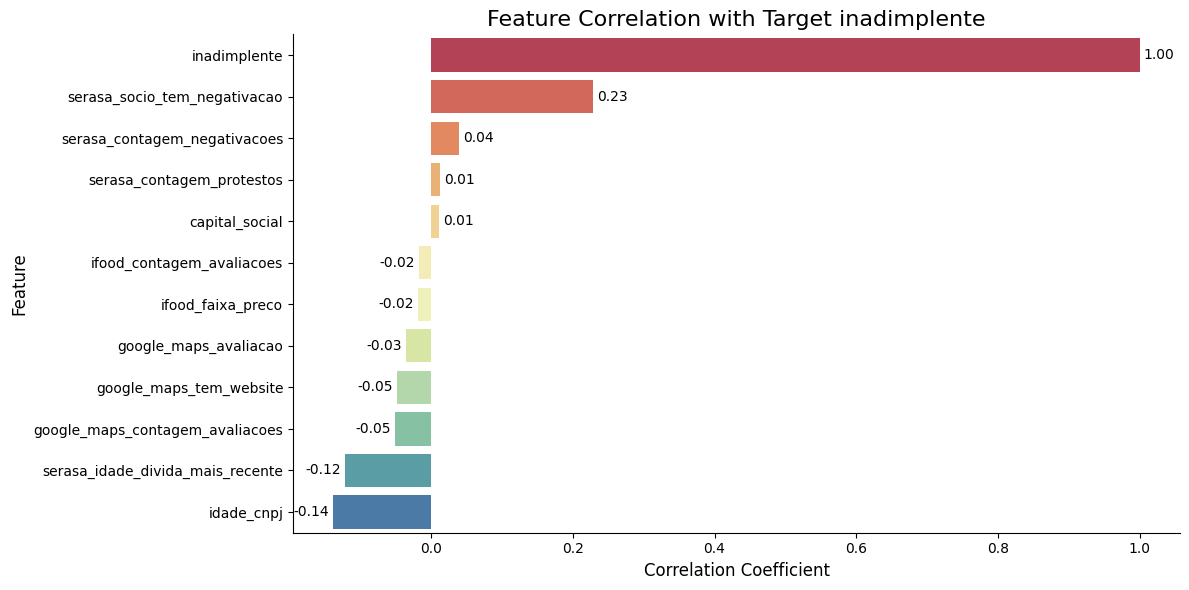

In [113]:
plot_correlation_matrix(df, df.iloc[:, -1:], title_suffix='inadimplente')

## Correlation of Features

In [114]:
# Compute correlation matrix (numeric only)
corr = df.corr(numeric_only=True)

# Plot with plotly.express
fig = px.imshow(
    corr,
    text_auto='.2f',  # format to 2 decimals
    color_continuous_scale='RdBu_r',
    title='Correlation Matrix'
)

fig.update_layout(
    width=900,
    height=600
)

fig.show()

# Pre-processing

## Feature Selection

In [115]:
categorical_cols = ['uf', 'municipio', 'segmento_cliente', 'natureza_juridica', 'fonte_cliente', 'cnae_codigo', 'serasa_credores']

numerical_cols = ['capital_social', 'idade_cnpj', 'serasa_contagem_negativacoes', 'serasa_contagem_protestos', 'serasa_idade_divida_mais_recente', 'ifood_contagem_avaliacoes', 'ifood_faixa_preco', 'google_maps_avaliacao', 'google_maps_contagem_avaliacoes']

In [116]:
all_features = numerical_cols + categorical_cols
results = []

for i in range(1, len(all_features) + 1):
    selected_features = all_features[:i]

    # Separating selected columns by type
    current_cat = [col for col in selected_features if col in categorical_cols]
    current_num = [col for col in selected_features if col in numerical_cols]

    frames = []

    # One-hot encode categorical columns
    if current_cat:
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        cat_array = encoder.fit_transform(df[current_cat])
        cat_df = pd.DataFrame(
            cat_array,
            columns=encoder.get_feature_names_out(current_cat),
            index=df.index
        )
        frames.append(cat_df)

    # Power + Scaler on numeric columns
    if current_num:
        num_data = df[current_num]
        power_transformer = PowerTransformer()
        num_powered = power_transformer.fit_transform(num_data)
        scaler = StandardScaler()
        num_scaled = scaler.fit_transform(num_powered)
        num_df = pd.DataFrame(num_scaled, columns=current_num, index=df.index)
        frames.append(num_df)

    # Combine processed features
    X_final = pd.concat(frames, axis=1)
    y_final = df['inadimplente']

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

    # Train and evaluate
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results.append((selected_features.copy(), acc))

# Show results
for features_used, acc in results:
    print(f"Features: {features_used} | Accuracy: {acc:.4f}")

Features: ['capital_social'] | Accuracy: 0.5931
Features: ['capital_social', 'idade_cnpj'] | Accuracy: 0.6188
Features: ['capital_social', 'idade_cnpj', 'serasa_contagem_negativacoes'] | Accuracy: 0.6384
Features: ['capital_social', 'idade_cnpj', 'serasa_contagem_negativacoes', 'serasa_contagem_protestos'] | Accuracy: 0.6376
Features: ['capital_social', 'idade_cnpj', 'serasa_contagem_negativacoes', 'serasa_contagem_protestos', 'serasa_idade_divida_mais_recente'] | Accuracy: 0.6380
Features: ['capital_social', 'idade_cnpj', 'serasa_contagem_negativacoes', 'serasa_contagem_protestos', 'serasa_idade_divida_mais_recente', 'ifood_contagem_avaliacoes'] | Accuracy: 0.6388
Features: ['capital_social', 'idade_cnpj', 'serasa_contagem_negativacoes', 'serasa_contagem_protestos', 'serasa_idade_divida_mais_recente', 'ifood_contagem_avaliacoes', 'ifood_faixa_preco'] | Accuracy: 0.6396
Features: ['capital_social', 'idade_cnpj', 'serasa_contagem_negativacoes', 'serasa_contagem_protestos', 'serasa_idade

## Train test split

In [139]:
X, y = df.drop(columns=['inadimplente']), df['inadimplente']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9966, 18), (2492, 18), (9966,), (2492,))

## Standardize, Encode and PowerTransform

In [119]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Definir transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('power', PowerTransformer()),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=3000))
])


pipeline.fit(X_train, y_train)

# Model Training

I tested dropping serasa_contagem_negativacoes and the accuracy dropped as well  
I tested using PCA and the accuracy dropped  
I tested setting class_weight='balanced' and the accuracy dropped

In [120]:
# clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
# models, predictions = clf.fit(X_train, X_test, y_train, y_test)
# models

# Model Evaluation

## Cross validation ROC AUC

In [121]:
cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')

array([0.7147809 , 0.73582737, 0.77639489, 0.73746127, 0.76426101])

## On train

In [155]:
y_pred_train = pipeline.predict(X_train)
y_true = y_train

### Classification Report

In [156]:
print(classification_report(y_true, y_pred_train))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      5858
           1       0.68      0.59      0.63      4108

    accuracy                           0.72      9966
   macro avg       0.71      0.70      0.70      9966
weighted avg       0.71      0.72      0.71      9966



### Confusion Matrix

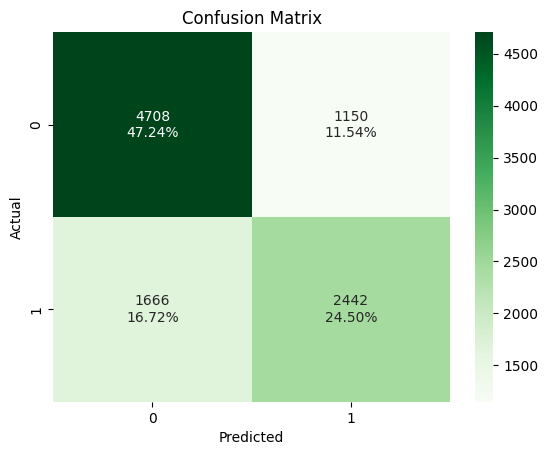

In [157]:
cm = confusion_matrix(y_true, y_pred_train)

total = cm.sum()

# Create labels with both count and percentage of total
labels = np.array([
    [f"{count}\n{count/total:.2%}" for count in row]
    for row in cm
])

sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Predictions

In [158]:
train_preds = pd.concat([X_train, y_train], axis=1)
train_preds['y_pred'] = y_pred_train
train_preds.sample(50)

,uf,municipio,segmento_cliente,natureza_juridica,fonte_cliente,cnae_codigo,capital_social,idade_cnpj,serasa_contagem_negativacoes,serasa_contagem_protestos,serasa_idade_divida_mais_recente,serasa_credores,serasa_socio_tem_negativacao,ifood_contagem_avaliacoes,ifood_faixa_preco,google_maps_avaliacao,google_maps_contagem_avaliacoes,google_maps_tem_website,inadimplente,y_pred
7108,PB,JOAO PESSOA,Pizza & Massas,213-5,Fonte 2,56.11-2-01,6.000000e+02,75.0,0,0,100,Other,1,0.0,0,0.00,0.0,0,0,1
3091,CE,FORTALEZA,Cafeteria,206-2,Fonte 1,56.11-2-03,8.500000e+04,12.5,0,0,100,Other,0,0.0,0,4.75,2.5,1,0,0
2652,PE,PAULISTA,Conveniência,213-5,Fonte 4,47.12-1-00,9.000000e+03,12.5,0,0,100,Other,0,0.0,0,0.00,0.0,0,0,1
7649,CE,PINDORETAMA,Mercearia & Mercado,213-5,Fonte 1,47.12-1-00,9.000000e+03,1800.0,0,0,100,Other,0,0.0,0,0.00,0.0,0,0,0
6154,CE,FORTALEZA,Padaria,213-5,Fonte 1,47.89-0-05,5.000500e+10,12.5,0,0,100,Other,0,0.0,0,0.00,0.0,0,1,0
7133,PE,JABOATAO DOS GUARARAPES,Restaurante Brasileiro,213-5,Fonte 2,56.20-1-03,4.000000e+03,1450.0,0,0,100,Other,0,0.0,0,0.00,0.0,0,0,0
8042,PE,PAULISTA,Doces & Confeitaria,213-5,Fonte 2,56.20-1-04,1.750000e+03,825.0,0,0,100,Other,1,0.0,0,0.00,0.0,0,0,1
10173,PE,RECIFE,Atacarejo & Supermercado,213-5,Fonte 5,47.55-5-02,4.000000e+04,675.0,4,16,2,Indústria,0,0.0,0,0.00,0.0,0,1,1
9729,CE,FORTALEZA,Doces & Confeitaria,213-5,Fonte 1,10.91-1-02,4.000000e+03,200.0,0,0,100,Other,0,0.0,0,0.00,0.0,0,0,0
11145,CE,FORTALEZA,Churrascaria,206-2,Fonte 5,56.11-2-01,1.250000e+04,525.0,0,0,100,Other,0,0.0,0,0.00,0.0,0,0,0


## On test

In [159]:
y_pred_test = pipeline.predict(X_test)
y_true = y_test

### Classification Report

In [126]:
print(classification_report(y_true, y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1496
           1       0.64      0.57      0.60       996

    accuracy                           0.70      2492
   macro avg       0.69      0.68      0.68      2492
weighted avg       0.70      0.70      0.70      2492



### Confusion Matrix

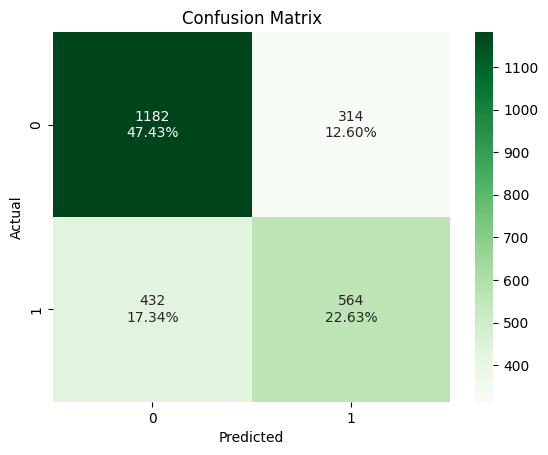

In [127]:
cm = confusion_matrix(y_true, y_pred_test)

total = cm.sum()

# Create labels with both count and percentage of total
labels = np.array([
    [f"{count}\n{count/total:.2%}" for count in row]
    for row in cm
])

sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Predictions

In [160]:
test_preds = pd.concat([X_test, y_test], axis=1)
test_preds['y_pred'] = y_pred_test
test_preds.sample(50)

,uf,municipio,segmento_cliente,natureza_juridica,fonte_cliente,cnae_codigo,capital_social,idade_cnpj,serasa_contagem_negativacoes,serasa_contagem_protestos,serasa_idade_divida_mais_recente,serasa_credores,serasa_socio_tem_negativacao,ifood_contagem_avaliacoes,ifood_faixa_preco,google_maps_avaliacao,google_maps_contagem_avaliacoes,google_maps_tem_website,inadimplente,y_pred
10115,CE,FORTALEZA,Padaria,213-5,Fonte 1,10.94-5-00,1250.0,675.0,0,0,100,Other,1,0.0,0,0.00,0.0,0,0,0
3883,CE,FORTALEZA,Restaurante Brasileiro,213-5,Fonte 2,56.12-1-00,4000.0,675.0,0,0,100,Other,1,0.0,0,0.00,0.0,0,1,1
4687,PE,OLINDA,Mercearia & Mercado,213-5,Fonte 5,10.94-5-00,25000.0,1025.0,0,0,100,Other,0,0.0,0,0.00,0.0,0,1,0
2991,PE,RECIFE,Japonês & Chinês & Asiático,213-5,Fonte 2,56.11-2-03,2500.0,2200.0,2,0,7,Financeiro,0,0.0,2,0.00,0.0,0,0,1
4385,CE,CAUCAIA,Lanches & Salgados,213-5,Fonte 5,47.55-5-03,1750.0,2200.0,0,0,100,Other,1,0.0,0,0.00,0.0,0,0,1
5756,PE,PAULISTA,Hotel,213-5,Fonte 1,56.11-2-03,0.5,400.0,0,0,100,Other,1,0.0,0,0.00,0.0,0,0,0
1743,CE,FORTALEZA,Restaurante Brasileiro,213-5,Fonte 1,56.12-1-00,9000.0,300.0,0,0,100,Other,1,0.0,0,0.00,0.0,0,1,0
7105,PE,JABOATAO DOS GUARARAPES,Hambúrguer,213-5,Fonte 2,56.11-2-03,1750.0,200.0,0,0,100,Other,0,0.0,0,0.00,0.0,0,1,1
10864,PE,RECIFE,Mercearia & Mercado,213-5,Fonte 1,47.12-1-00,4000.0,75.0,0,0,100,Other,0,0.0,0,0.00,0.0,0,1,0
4404,PE,RECIFE,Doces & Confeitaria,213-5,Fonte 1,56.20-1-04,4000.0,75.0,0,0,100,Other,0,0.0,0,0.00,0.0,0,0,0


## Learning Curve

In [128]:
def plot_learning_curve(model, X, y, title="Learning Curve", scoring="f1_weighted", cv_splits=5):
    """
    Plot the learning curve for a given model and dataset.

    Parameters:
    - model (estimator): A scikit-learn estimator (e.g., RandomForestClassifier).
    - X (np.ndarray): Feature matrix.
    - y (np.ndarray): Target labels.
    - title (str): Title for the plot.
    - scoring (str): Metric to evaluate model performance (default = 'accuracy').
    - cv_splits (int): Number of cross-validation folds.
    """
    # Create a stratified K-fold split strategy
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=0)

    # Define relative sizes of training data to evaluate
    train_sizes = np.linspace(0.05, 0.95, 19)

    # Compute training and validation scores for different training sizes
    train_sizes_abs, train_scores, val_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        train_sizes=train_sizes,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        shuffle=True,
        random_state=0
    )

    # Compute mean and standard deviation for error bands
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes_abs, train_mean, 'o-', label='Training Accuracy', color='blue')
    plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

    plt.plot(train_sizes_abs, val_mean, 'o-', label='Validation Accuracy', color='green')
    plt.fill_between(train_sizes_abs, val_mean - val_std, val_mean + val_std, alpha=0.2, color='green')

    # X-axis in percentage form for clarity
    percent_labels = [f"{int(p * 100)}%" for p in train_sizes]
    plt.xticks(train_sizes_abs, percent_labels, rotation=45)

    # Set plot titles and labels
    plt.title(title, fontsize=14, weight='bold')
    plt.xlabel("Training Set Size (%)")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [129]:
# plot_learning_curve(pipeline, X, y, title="Learning Curve", scoring="f1_weighted", cv_splits=5)

## ROC Curve

# Optimize Model